# Effects of Time on Loan Characteristics
## by Rasha Hosny

## Investigation Overview

> I want to investigate some data related to the borrowers such as income to dept ratio and what they can afford on monthly baseis. Also I want to investigate some data related to the loan it self such as Loan Origination Quarter, loan status, APR.

## Dataset Overview

> The data consists of 81 record for each loan, some of these data has null values and some has non-valuable data. These data is ranged between 2005 and 2014 with various characteristics of those loans. Out of these data there are 61 numeric variables and 20 objectis variables. I will work on 18 variables out of 81 and they are consisting of 5 discrete variables and 13 continuous variables.

In [4]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [5]:
# load in the dataset into a pandas dataframe
loans = pd.read_csv('prosperLoanData.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Loan Origination Quarter

> I begin with detecting which quarter has the most loan origination. It was noticed here that Q3 in 2013 has the higher frequency of values more than 14000 number of listing and the Q2 2009 has the lowest one which is almost zero. most of the quarters has values ranged from 4000 till 1000 number. 

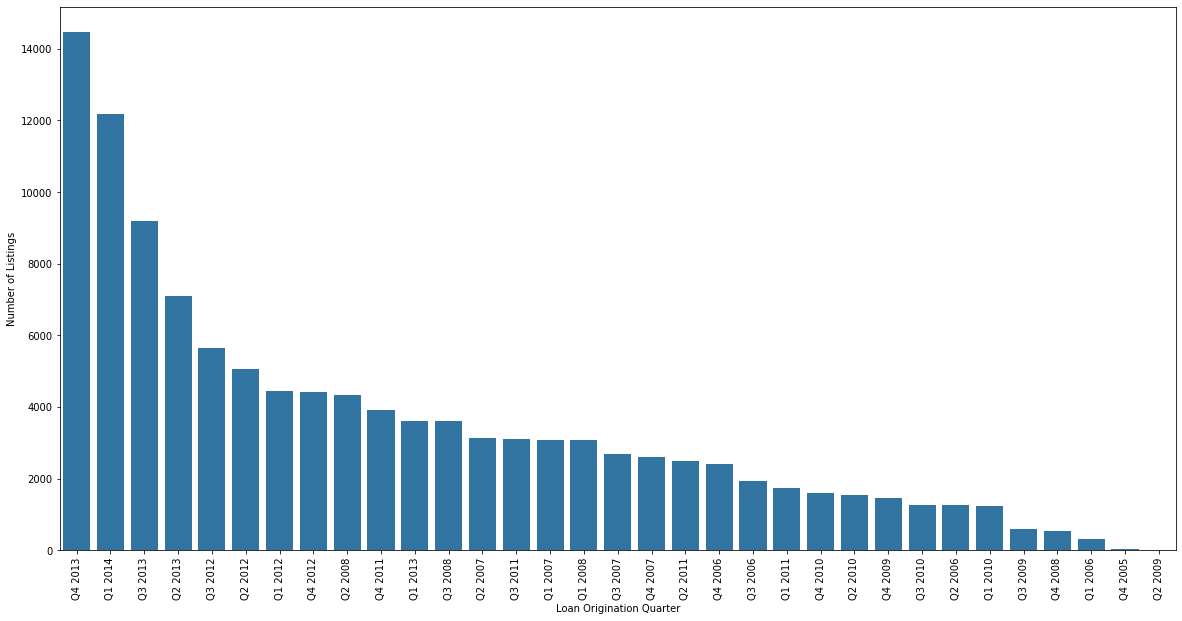

In [7]:
#to check which quarter has more frequent of loan generation
freq = loans['LoanOriginationQuarter'].value_counts()
gen_order = freq.index
plt.figure(figsize=(20,10))
base_color = sb.color_palette()[0]
sb.countplot(data = loans , x = 'LoanOriginationQuarter', color=base_color, order=gen_order)
plt.xlabel('Loan Origination Quarter')
plt.ylabel('Number of Listings')
plt.xticks(rotation=90);

## Fluctuation of loan orgination with years

> I have found during my investiagtion that origination loans trend start to increase from the first quarter of 2006 then faill in the last quarter of 2008 till Q3 2009, I think this is where the world econonmy has been failld. I have found this on the balance web site ("The 2008 financial crisis was the worst economic disaster since the Great Depression of 1929. It occurred despite the efforts of the Federal Reserve and the U.S. Department of the Treasury. The crisis led to the Great Recession, where housing prices dropped more than the price plunge during the Great Depression. Two years after the recession ended, unemployment was still above 9%. That doesn't count those discouraged workers who had given up looking for a job.") It has been noticed also that after 2009 the loan origination begain to increase with little fluctuation till the end of the series.

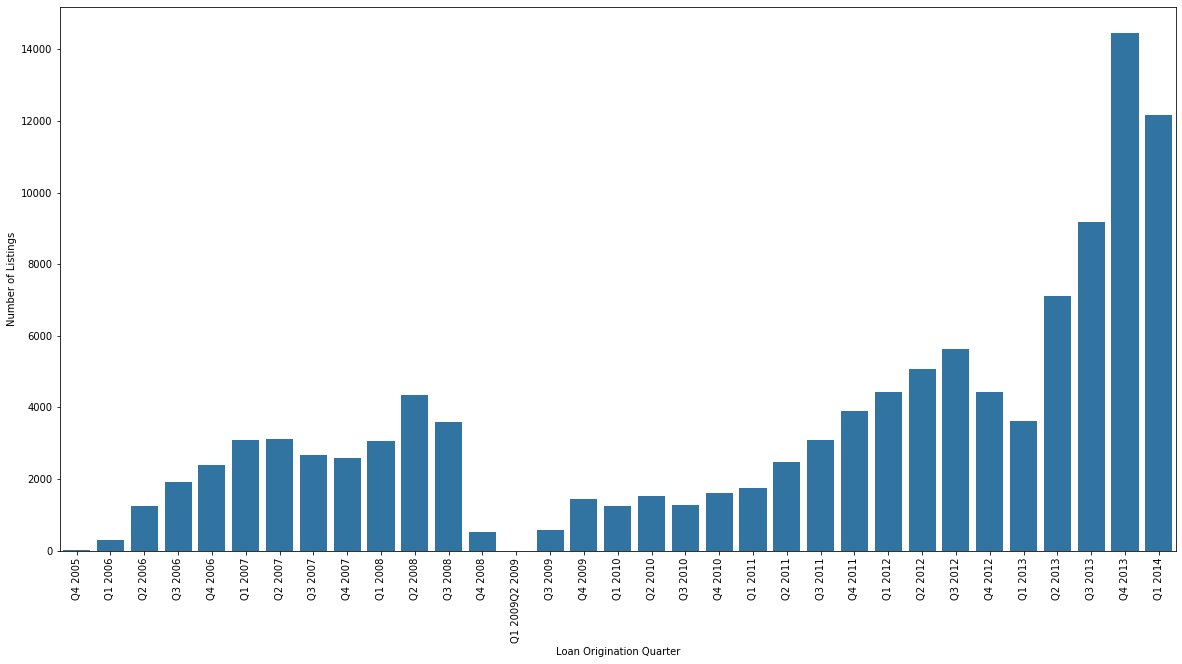

In [8]:
# make the 'LoanOriginationQuarter' categorical data type 
quarter = ['Q4 2005', 'Q1 2006', 'Q2 2006', 'Q3 2006', 'Q4 2006', 'Q1 2007', 'Q2 2007', 'Q3 2007', 'Q4 2007', 'Q1 2008', 'Q2 2008', 'Q3 2008', 'Q4 2008', 'Q1 2009'
          'Q2 2009', 'Q3 2009', 'Q4 2009', 'Q1 2010', 'Q2 2010', 'Q3 2010', 'Q4 2010', 'Q1 2011', 'Q2 2011', 'Q3 2011', 'Q4 2011', 'Q1 2012', 'Q2 2012', 'Q3 2012', 'Q4 2012',
          'Q1 2013', 'Q2 2013', 'Q3 2013', 'Q4 2013', 'Q1 2014']
cat = pd.api.types.CategoricalDtype(categories=quarter, ordered=True)
loans['LoanOriginationQuarter'] = loans['LoanOriginationQuarter'].astype(cat)
loans = loans.loc[loans['LoanOriginationQuarter'].isin(['Q4 2005', 'Q1 2006', 'Q2 2006', 'Q3 2006', 'Q4 2006', 'Q1 2007', 'Q2 2007', 'Q3 2007', 'Q4 2007', 'Q1 2008', 'Q2 2008', 'Q3 2008', 'Q4 2008',
          'Q1 2009' ,'Q2 2009', 'Q3 2009', 'Q4 2009', 'Q1 2010', 'Q2 2010', 'Q3 2010', 'Q4 2010', 'Q1 2011', 'Q2 2011', 'Q3 2011', 'Q4 2011', 'Q1 2012', 'Q2 2012', 'Q3 2012', 'Q4 2012',
          'Q1 2013', 'Q2 2013', 'Q3 2013', 'Q4 2013', 'Q1 2014'])]
plt.figure(figsize=(20,10))
sb.countplot(data = loans , x = 'LoanOriginationQuarter', color=base_color)
plt.xlabel('Loan Origination Quarter')
plt.ylabel('Number of Listings')
plt.xticks(rotation=90);

## Correlation between Loan characteristics
> I study the correlation between loan chractristics using heatmap. A heatmap is a two-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colors.

> There are positive strong relation between borrowerAPR and borrowerRate and between upper and lower credit score; in which it's logic as APR depend on Rate. But for other pairs, there are no strong positive relationships. -ve sign for borrower rate and APR with credit score is logic also as higher credit score means the borrowers are more trusted, therefore it recevied lower APR.

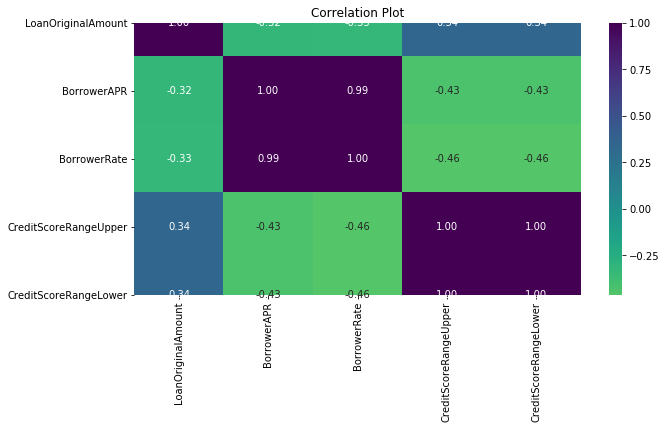

In [9]:
# first correlation is between the loan chractristics
num_var = ['LoanOriginalAmount', 'BorrowerAPR', 'BorrowerRate', 'CreditScoreRangeUpper', 'CreditScoreRangeLower']
# correlation plot
plt.figure(figsize = [10, 5])
sb.heatmap(loans[num_var].corr(), annot = True, fmt = '.2f', cmap = 'viridis_r', center = 0)
plt.title('Correlation Plot') 
plt.show()

## The effect of time on income range and Loan categories
> It has been noticed here that starting from year 2008 the borrowers beagins their loans and that Dept consolidation is the king amoung all of those loans. Also the loans has a large increase starting from last quarntile for 2013.

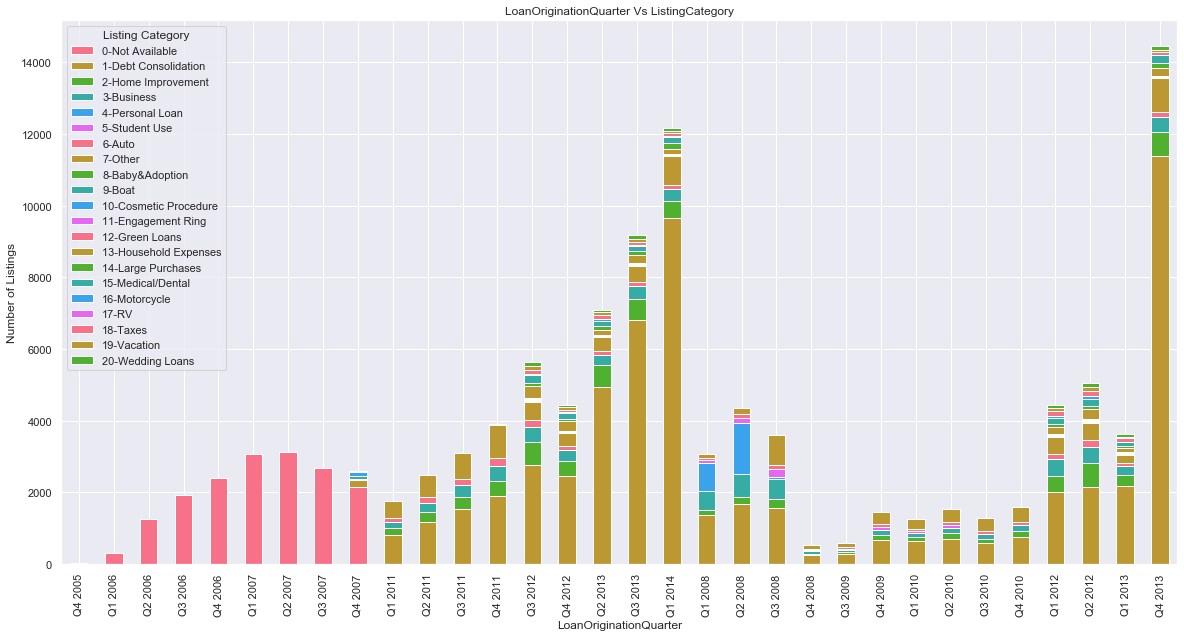

In [11]:
# create legend label descriptions and visualize the data using multivariate plot
listing_plot = loans.groupby(['ListingCategory (numeric)', 'LoanOriginationQuarter']).size().reset_index().pivot(columns='ListingCategory (numeric)', index='LoanOriginationQuarter', values=0)
listing_plot.plot(kind='bar', stacked=True)

plt.legend(['0-Not Available', '1-Debt Consolidation', '2-Home Improvement', '3-Business', '4-Personal Loan', '5-Student Use', '6-Auto', '7-Other', '8-Baby&Adoption', '9-Boat', '10-Cosmetic Procedure', 
              '11-Engagement Ring', '12-Green Loans', '13-Household Expenses', '14-Large Purchases','15-Medical/Dental', '16-Motorcycle', '17-RV', '18-Taxes', '19-Vacation', '20-Wedding Loans'], title='Listing Category')
sb.set(rc={'figure.figsize':(15, 10)})
plt.title('LoanOriginationQuarter Vs ListingCategory')
plt.ylabel('Number of Listings')
plt.xlabel('LoanOriginationQuarter')
plt.xticks(rotation=90);

> Finally I study the relation between Income Range and Loan Origination Quarter. Here the I found why loans starts to increase from 2013, this is because the income range has noticable increase in this period. The sallary ranges of 75-99 and +100 thousand dollar increase starting from 2013. 

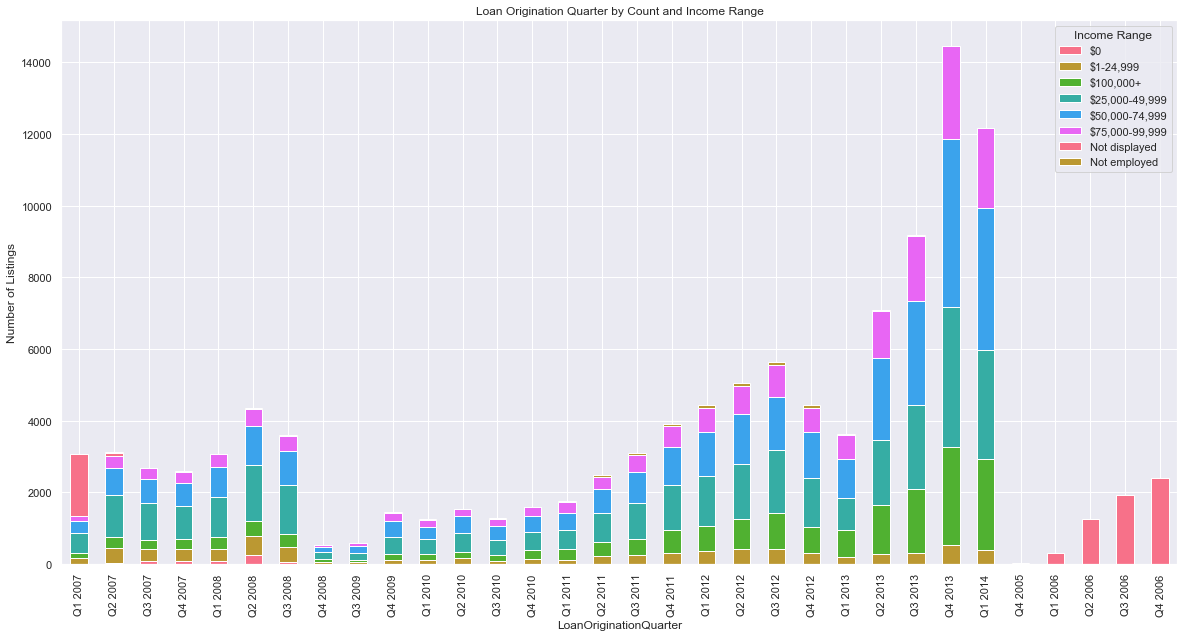

In [10]:
# make the 'LoanOriginationQuarter' categorical data type 
quarter = ['Q4 2005', 'Q1 2006', 'Q2 2006', 'Q3 2006', 'Q4 2006', 'Q1 2007', 'Q2 2007', 'Q3 2007', 'Q4 2007', 'Q1 2008', 'Q2 2008', 'Q3 2008', 'Q4 2008', 'Q1 2009'
          'Q2 2009', 'Q3 2009', 'Q4 2009', 'Q1 2010', 'Q2 2010', 'Q3 2010', 'Q4 2010', 'Q1 2011', 'Q2 2011', 'Q3 2011', 'Q4 2011', 'Q1 2012', 'Q2 2012', 'Q3 2012', 'Q4 2012',
          'Q1 2013', 'Q2 2013', 'Q3 2013', 'Q4 2013', 'Q1 2014']
cat = pd.api.types.CategoricalDtype(categories=quarter, ordered=True)
loans['LoanOriginationQuarter'] = loans['LoanOriginationQuarter'].astype(cat)
loans = loans.loc[loans['LoanOriginationQuarter'].isin(['Q4 2005', 'Q1 2006', 'Q2 2006', 'Q3 2006', 'Q4 2006', 'Q1 2007', 'Q2 2007', 'Q3 2007', 'Q4 2007', 'Q1 2008', 'Q2 2008', 'Q3 2008', 'Q4 2008',
          'Q1 2009' ,'Q2 2009', 'Q3 2009', 'Q4 2009', 'Q1 2010', 'Q2 2010', 'Q3 2010', 'Q4 2010', 'Q1 2011', 'Q2 2011', 'Q3 2011', 'Q4 2011', 'Q1 2012', 'Q2 2012', 'Q3 2012', 'Q4 2012',
          'Q1 2013', 'Q2 2013', 'Q3 2013', 'Q4 2013', 'Q1 2014'])]

#visualize the data using multivariate plot
sb.set(rc={'figure.figsize':(20, 10)})
sb.set_palette('husl')
loanquart_plot = loans.groupby(['IncomeRange', 'LoanOriginationQuarter']).size().reset_index().pivot(columns='IncomeRange', 
                                index='LoanOriginationQuarter', values=0)
loanquart_plot.plot(kind='bar', stacked=True)
plt.legend(title='Income Range')
plt.title('Loan Origination Quarter by Count and Income Range')
plt.ylabel('Number of Listings')
plt.xlabel('LoanOriginationQuarter')
plt.xticks(rotation=90);

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <ProsperLoan_slide_deck
>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [2]:
!jupyter nbconvert ProsperLoan_slide_deck.ipynb --to slides --no-input

[NbConvertApp] Converting notebook ProsperLoan_slide_deck.ipynb to slides
[NbConvertApp] Writing 507355 bytes to ProsperLoan_slide_deck.slides.html
